In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 이미지 다루기 https://wikidocs.net/153082

In [ ]:
#깜비 사진: https://drive.google.com/file/d/1REcmnWCNEapxWSK_NVRrwqdUNpJR20Os/view?usp=drive_link

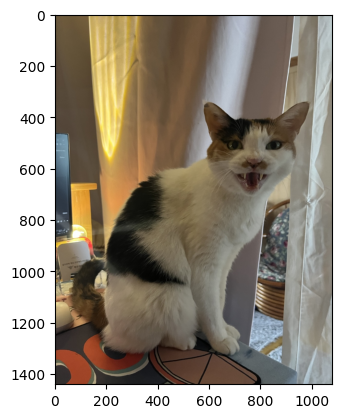

In [ ]:
# Pillow 라이브러리 불러오기
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 고양이 이미지 불러와서 img라는 변수에 입력
img = Image.open('/content/samsuni.jpg')
image_array = np.array(img)
# image_dtype = image_array.dtype

# print("Image data type:", image_dtype)
plt.imshow(img)

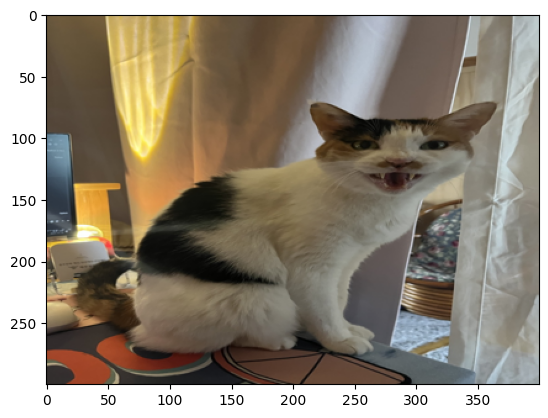

In [ ]:
# 1.이미지 사이즈 변경
img_resized = img.resize((400,300))

# 변경한 이미지 출력
plt.imshow(np.array(img_resized))

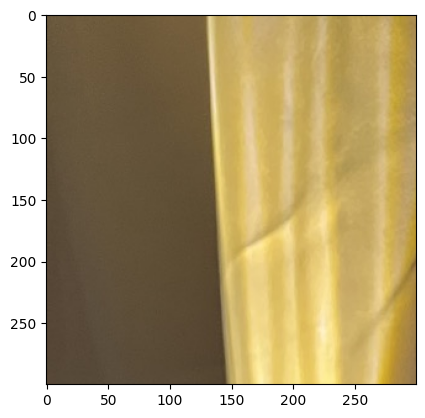

In [ ]:
# 2. 이미지 자르기
img_cropped = img.crop((0,0,300,300))

# 잘라낸 이미지 출력
plt.imshow(np.array(img_cropped))

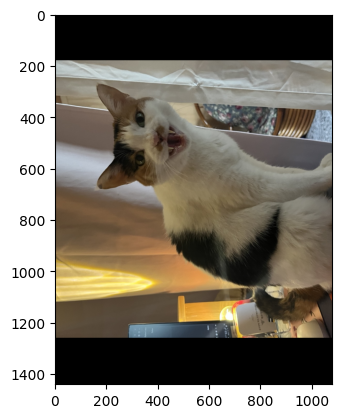

In [ ]:
# 3. 이미지 90도 회전
img_rotated = img.rotate(90)

# 회전한 이미지 출력
plt.imshow(np.array(img_rotated))

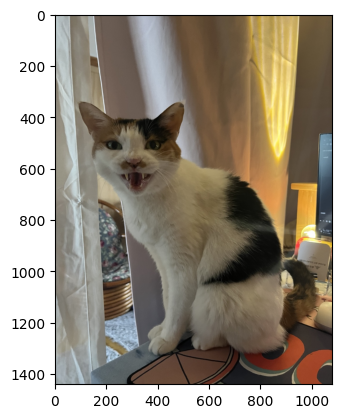

In [ ]:
# 4. 이미지 대칭
# 좌우대칭
img_flipped_LR = img.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(np.array(img_flipped_LR))

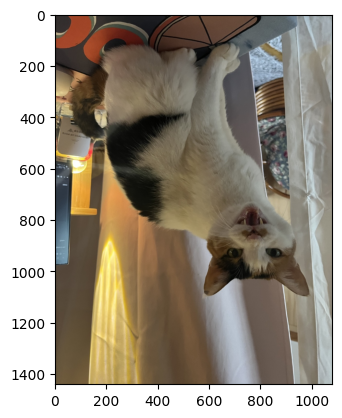

In [ ]:
# 상하대칭
img_flipped_TB = img.transpose(Image.FLIP_TOP_BOTTOM)
plt.imshow(np.array(img_flipped_TB))

In [ ]:
# 5. 상하반전한 이미지 저장
img_flipped_TB.save('/content/samsuni_flip.jpg')

# 이미지 조작하기



## 참고 https://www.youtube.com/watch?v=Zvd276j9sZ8

In [ ]:
# customDataset.py : https://www.youtube.com/watch?v=ZoZHd0Zm3RY  (see 1:19 - 4:50)
# cats_dogs.csv : https://www.kaggle.com/datasets/c75fbba288ac0418f7786b16e713d2364a1a27936e63f4ec47502d73d6ef30ab
# cat&dog dataset : https://www.kaggle.com/c/dogs-vs-cats/data

In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from skimage import io

class CatsAndDogsDataset(Dataset):
  def __init__(self, csv_file, root_dir, transform=None):
    self.annotations = pd.read_csv(csv_file)
    self.root_dir = root_dir
    self.transform = transform

  def __len__(self):
    return len(self.annotations)

  def __getitem__(self, index):
    img_path = os.path.join(self.root_dir, self.annotations.iloc[index,0])
    image = io.imread(img_path)
    y_label = torch.tensor(int(self.annotations.iloc[index,1]))

    if self.transform:
      image = self.transform(image)

    return (image,y_label)

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image

my_transforms = transforms.Compose([  # to combine several different transformations
    transforms.ToPILImage(),  # format - pillow
    transforms.Resize((256,256)),
    transforms.RandomCrop((224,224)),
    transforms.ColorJitter(brightness=0.5),
    transforms.RandomRotation(degrees=45),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.05),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0])   #(value-mean)/std
])

dataset = CatsAndDogsDataset(csv_file = "/content/cats_dogs_resized/cats_dogs.csv", root_dir = '/content/cats_dogs_resized', transform=my_transforms)

img_num=0
for _ in range(5):
  for img, label in dataset:
    save_image(img, 'img'+str(img_num)+'.png')
    img_num += 1

In [ ]:
# This function will read the image using its path with opencv
def Load_Image(Path):
    img = cv.imread(Path)[:,:,::-1] # opencv read the images in BGR format
                                    # so we use [:,:,::-1] to convert from BGR to RGB
    return img

def Show_Image(Image, Picture_Name, ax=None):
    plt.imshow(Image)
    plt.title(Picture_Name)
    plt.show()

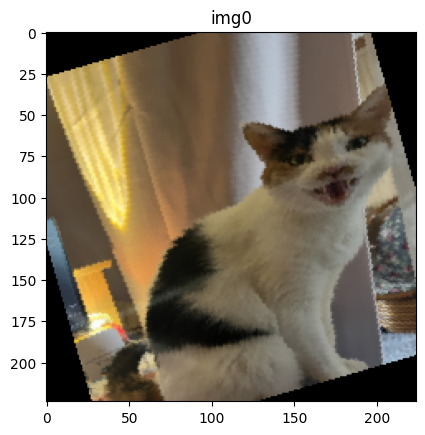

None


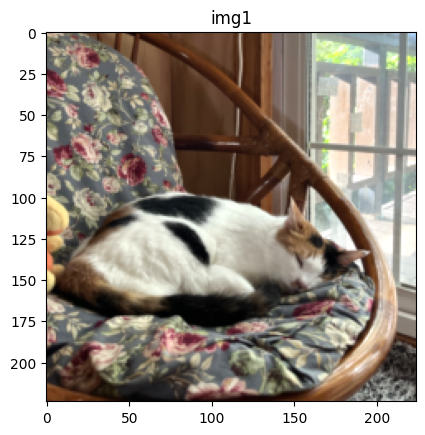

None


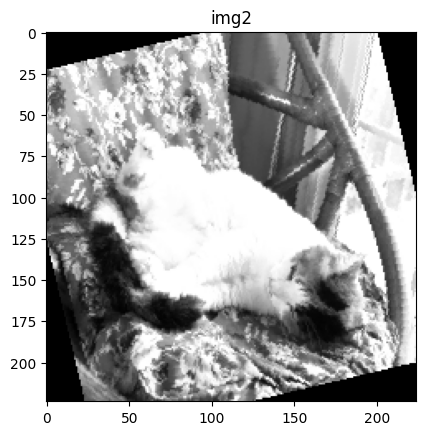

None


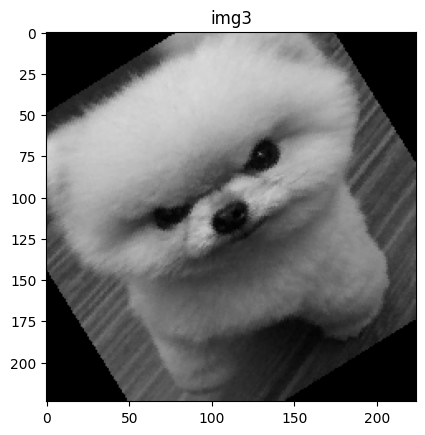

None


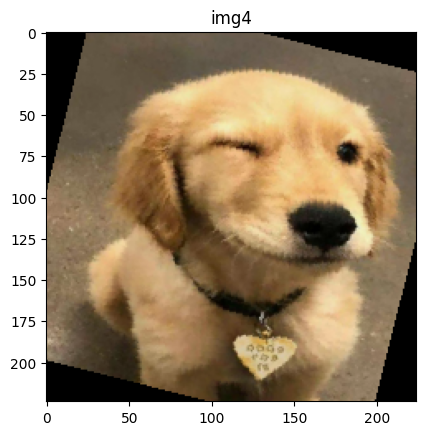

None


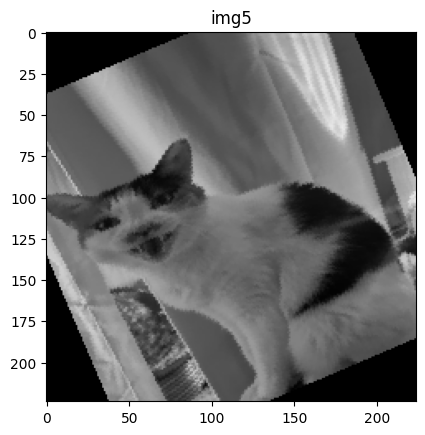

None


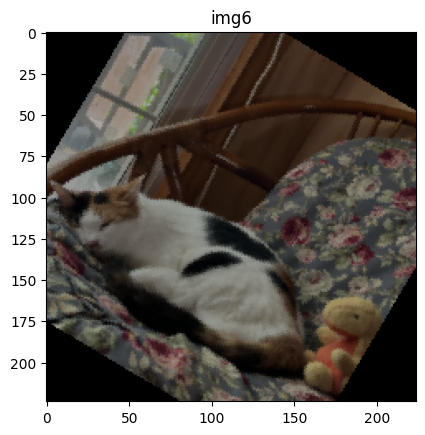

None


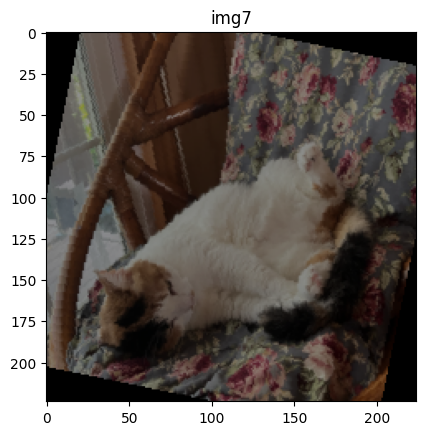

None


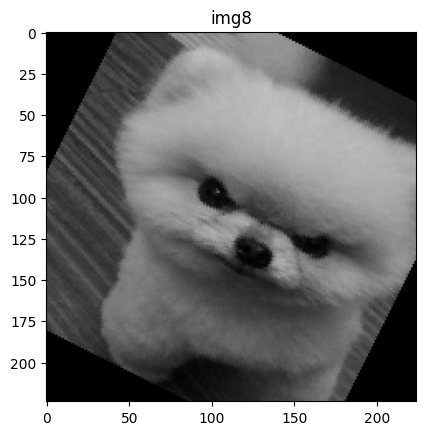

None


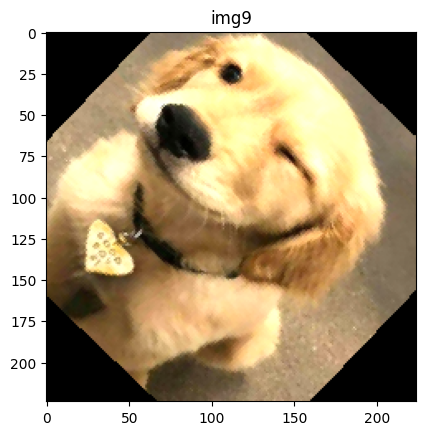

None


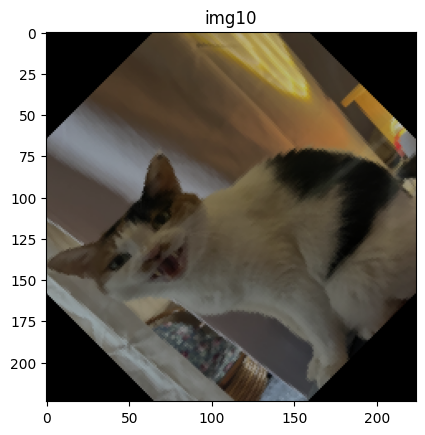

None


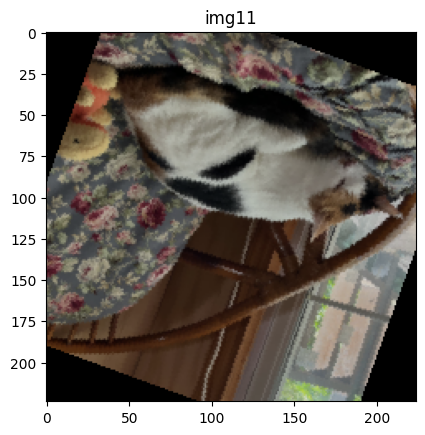

None


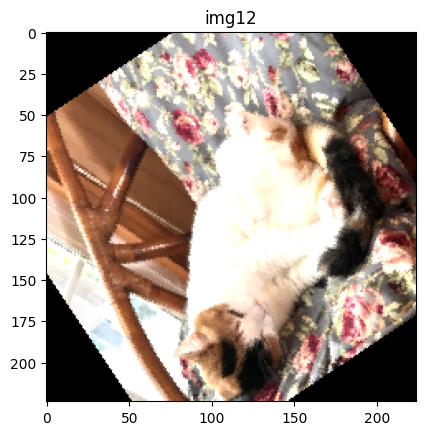

None


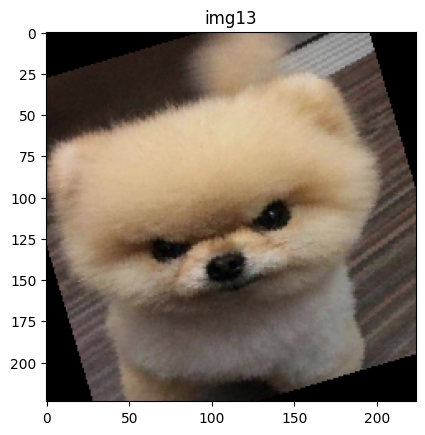

None


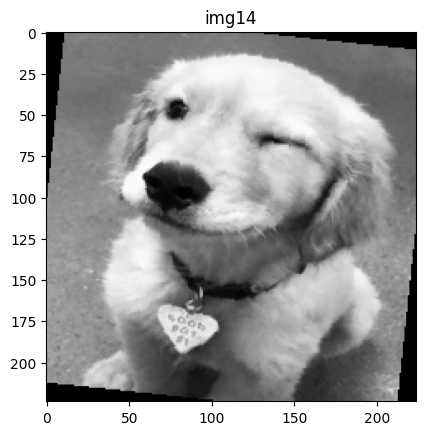

None


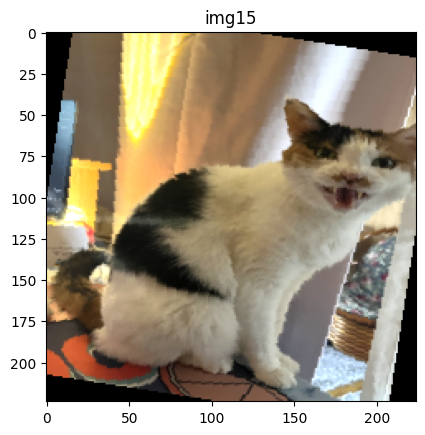

None


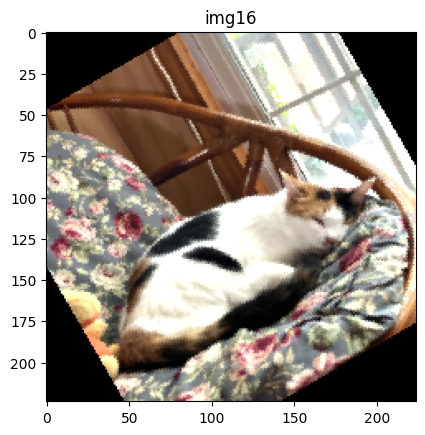

None


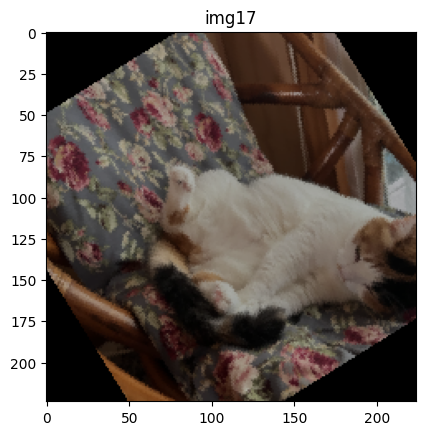

None


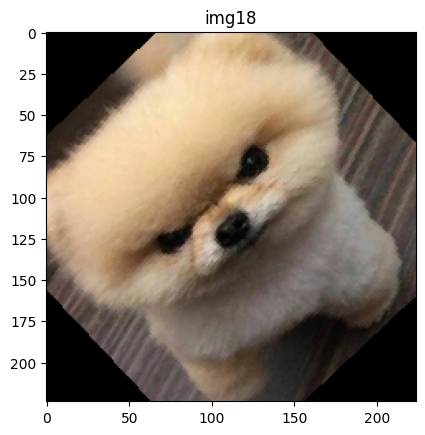

None


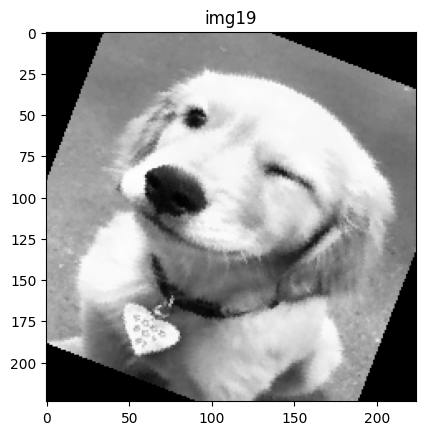

None


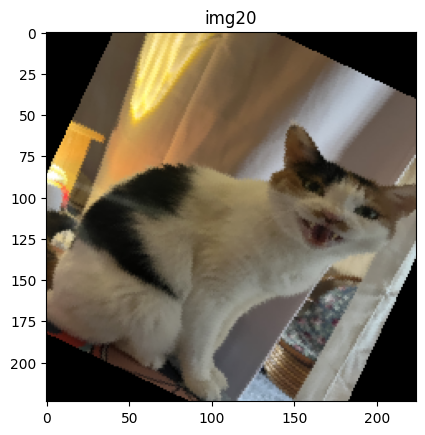

None


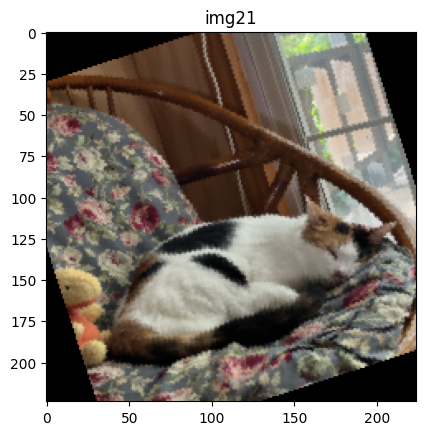

None


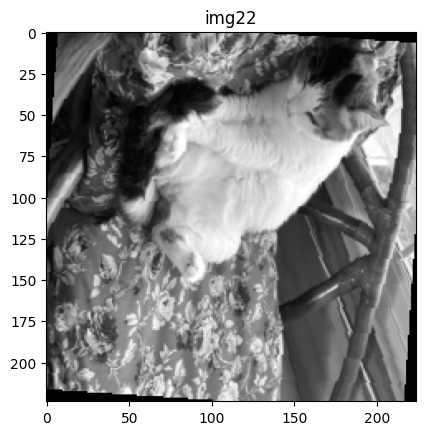

None


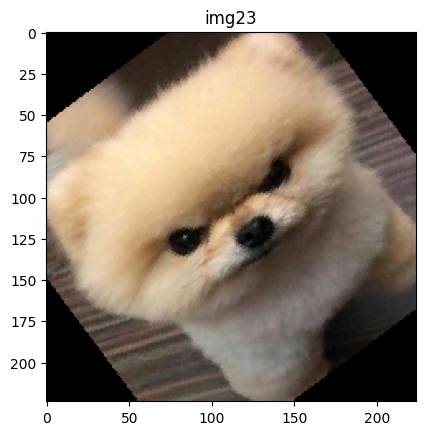

None


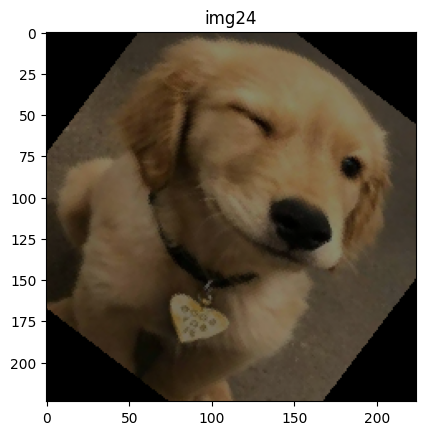

None


In [ ]:
for _ in range(25):
  img_name = f"img{_}"
  img_path = f"/content/img{_}.png"
  img = Load_Image(img_path)
  print(Show_Image(img, img_name))

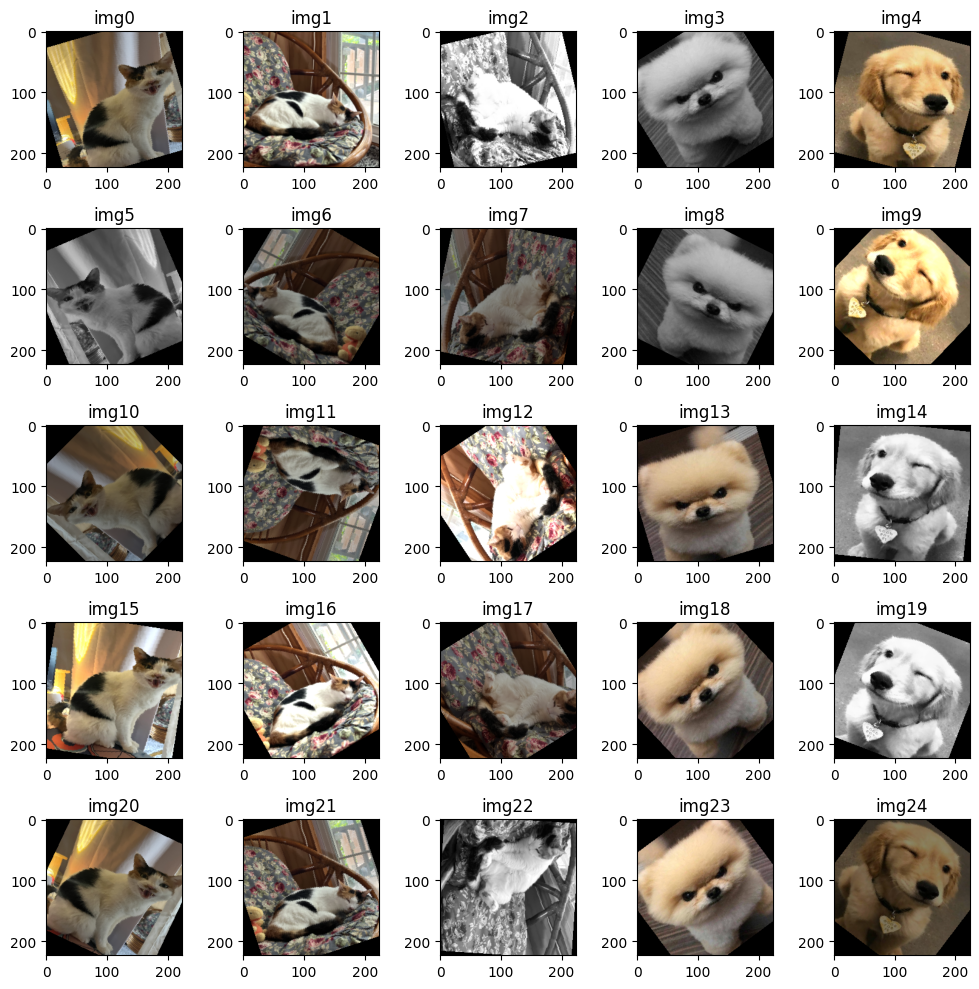

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Assuming Load_Image and Show_Image functions are defined as described
def Load_Image(Path):
    img = cv2.imread(Path)[:,:,::-1]  # Convert from BGR to RGB
    return img

def Show_Image(Image, Picture_Name, ax=None):
    if ax is None:
        plt.imshow(Image)
        plt.title(Picture_Name)
        plt.show()
    else:
        ax.imshow(Image)
        ax.set_title(Picture_Name)
        return ax

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        img_name = f"img{i * 5 + j}"
        img_path = f"/content/img{i * 5 + j}.png"
        img = Load_Image(img_path)

        # Show_Image now returns the axes object after displaying the image
        ax = Show_Image(img, img_name, ax=axes[i, j])

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Display the plot
plt.show()


## 참고 https://www.kaggle.com/code/mohamedmustafa/7-data-augmentation-on-images-using-pytorch

## 오늘 실습 목록 https://pytorch.org/vision/main/transforms.html


torchvision.transforms.Resize()

torchvision.transforms.RandomCrop()

torchvision.transforms.ColorJitter()

torchvision.transforms.RandomRotation()

torchvision.transforms.RandomHorizontalFlip()               

torchvision.transforms.RandomVerticalFlip()

torchvision.transforms.RandomGrayscale()

torchvision.transforms.Normalize()


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.utils import save_image
import cv2 as cv
from matplotlib import pyplot as plt


In [ ]:
# This function will read the image using its path with opencv
def Load_Image(Path):
    img = cv.imread(Path)[:,:,::-1] # opencv read the images in BGR format
                                    # so we use [:,:,::-1] to convert from BGR to RGB
    return img

img2 = Load_Image('/content/samsuni2.jpg')
img3 = Load_Image('/content/samsuni3.jpg')

In [ ]:
def Show_Image(Image, Picture_Name):
    plt.imshow(Image)
    plt.title(Picture_Name)
    plt.show()

1) torchvision.transforms.Resize()

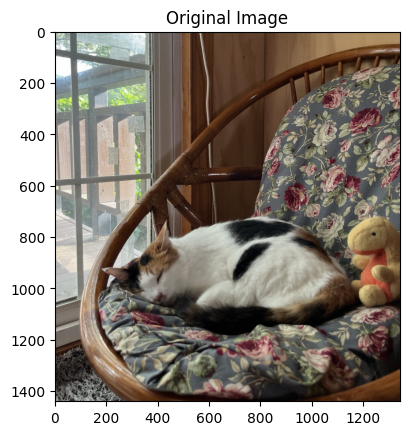

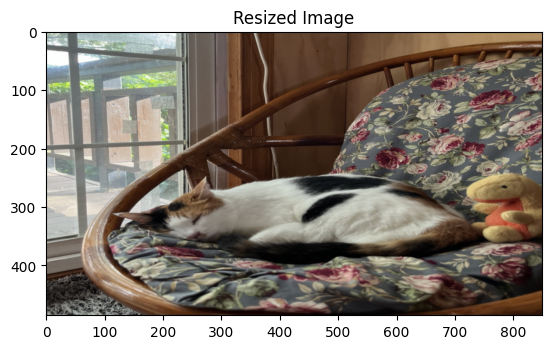

In [ ]:
Resize_Transformation = transforms.Compose([
   transforms.ToPILImage(), # the transform usually work with PIL images
   transforms.Resize(size=(486,850)),
])

# Testing The Transformation...
Resized_Img = Resize_Transformation(img2)
Show_Image(img2, 'Original Image')
Show_Image(Resized_Img, 'Resized Image')